# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/ziya07/psychological-state-identification-dataset

## Problem description

This project focuses on a comprehensive dataset capturing physiological, behavioral, and environmental data from biosensors to study students' psychological states during educational activities. It lays the foundation for advanced machine learning research, aiming to develop models capable of real-time analysis of stress, emotional engagement, and focus. Key features include heart rate variability, EEG power bands, environmental factors like noise and light, and behavioral metrics such as focus duration. By offering insights into well-being and engagement, the dataset aims to advance mental health support and optimize learning experiences through innovative applications of biosensor technology.

### Column description
| No.| Column      | Description | Type |
| -- | ----------- | ----------- | -- |
| 1. | ID | Unique identifier for each participant. | Integer|
| 2. | Time | Timestamp indicating when the data was recorded.| Datetime|
| 3. | HRV (ms) | Heart Rate Variability-Indicates stress and relaxation states. | Float
| 4. | Gen(GSR) (μS) | Galvanic Skin Response-Reflects stress through changes in skin conductivity. |Float |
| 5. | EEG Power Bands | Captures brain activity in Delta, Alpha, and Beta bands. | String|
| 6. | Blood Pressure (mmHg) | Measures cardiovascular response. |String |
| 7. | Oxygen Saturation (%) | Indicates oxygen levels in the blood. |Float |
| 8. | Heart Rate (BPM) | Shows physical or emotional excitement. |Integer |
| 9. | Ambient Noise (dB) | Noise intensity during educational activities. |Float |
| 10. | Cognitive Load | Low, Moderate, High- reflects mental effort. |Categorical |
| 11. | Mood State | Happy, Neutral, Sad, Anxious- represents emotional conditions. |Categorical | 
| 12. | Psychological State | Stressed, Relaxed, Focused, Anxious- inferred from biosensor data.|Categorical | 
| 13. | Respiration Rate (BPM) | Measures breathing activity |Integer | 
| 14. | Skin Temp (°C) | Indicates stress or comfort levels. |Float | 
| 15. | Focus Duration (s) | Time spent in sustained attention on a task. |Integer |
| 16. | Task Type | Lecture, Group Discussion, Assignment, Exam. |Categorical |
| 17. | Age |Participant age. |Integer |
| 18. | Gender | Male, Female, Other |Categorical |
| 19. | Educational Level | High School, Undergraduate, Postgraduate |Categorical |
| 20. | Study Major |Science, Arts, Engineering |Categorical |

# Dependencies loading

In [1]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# dataset split
# from sklearn.model_selection import train_test_split

# missing values imputing
# from sklearn.impute import KNNImputer
from kedro.io import DataCatalog
import yaml
import os
# np.random.seed(2024)

# Data loading

In [2]:
# move to the root directory
os.chdir(os.path.dirname(os.getcwd()))

In [96]:

# load the catalog
with open("conf/base/catalog.yml") as f:
    conf_catalog = yaml.safe_load(f)
catalog = DataCatalog.from_config(conf_catalog)

In [97]:
data = catalog.load("preprocessed_data")
data.head()

,Time,HRV,GSR,Oxygen Saturation,Heart Rate,Ambient Noise,Cognitive Load,Mood State,Psychological State,Respiration Rate,...,Task Type,Age,Gender,Educational Level,Study Major,EEG Power Bands D,EEG Power Bands A,EEG Power Bands B,Blood Pressure Systolic,Blood Pressure Diastolic
0,2024-01-01 00:00:00,33.039739,1.031806,98.433312,98,56.863054,Low,Anxious,Stressed,21,...,Exam,22,Female,Postgraduate,Engineering,0.758365,1.423248,0.615770,114,79
1,2024-01-01 00:00:01,49.914651,1.340983,98.944505,70,45.343430,Low,Neutral,Stressed,21,...,Assignment,23,Male,Undergraduate,Arts,0.552042,1.858066,0.376605,113,86
2,2024-01-01 00:00:02,67.894401,1.006014,95.990753,91,50.029264,High,Sad,Relaxed,17,...,Group Discussion,18,Female,Postgraduate,Arts,1.026137,1.350493,2.308769,124,74
3,2024-01-01 00:00:03,34.705373,0.849270,98.173643,95,60.802104,Low,Neutral,Anxious,12,...,Exam,28,Female,High School,Engineering,1.607572,1.661967,0.344134,120,73
4,2024-01-01 00:00:04,52.896549,0.879084,96.225051,65,40.696384,High,Anxious,Stressed,14,...,Group Discussion,24,Female,High School,Engineering,1.055004,0.764332,1.074537,111,80


# Data info

## Null values

In [161]:
# data.shape[0]

1000

In [162]:
data.isna().sum()/data.shape[0]

Time                        0.0
HRV                         0.0
GSR                         0.0
Oxygen Saturation           0.0
Heart Rate                  0.0
Ambient Noise               0.0
Cognitive Load              0.0
Mood State                  0.0
Psychological State         0.0
Respiration Rate            0.0
Skin Temp                   0.0
Focus Duration              0.0
Task Type                   0.0
Age                         0.0
Gender                      0.0
Educational Level           0.0
Study Major                 0.0
EEG Power Bands D           0.0
EEG Power Bands A           0.0
EEG Power Bands B           0.0
Blood Pressure Systolic     0.0
Blood Pressure Diastolic    0.0
dtype: float64

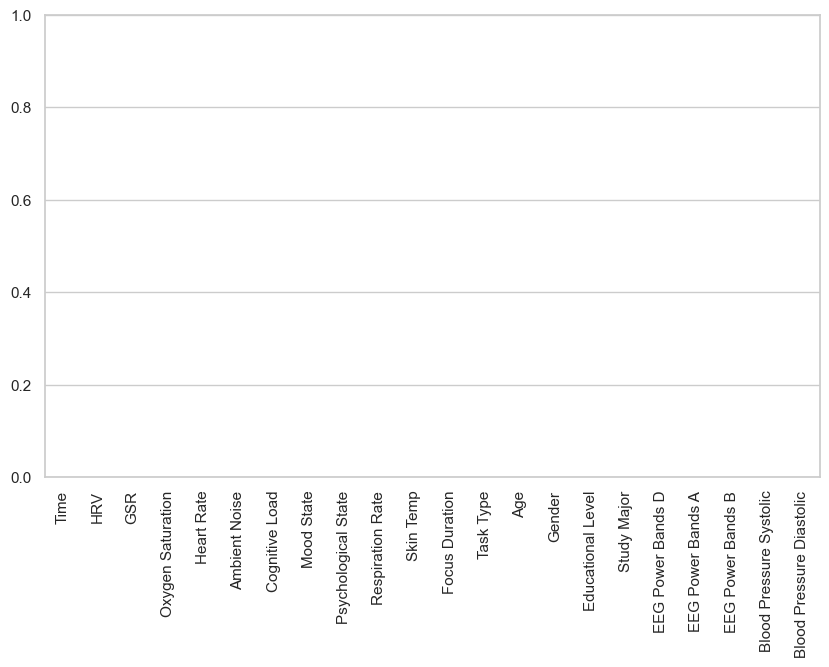

In [167]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.barplot(y = data.isna().sum()/data.shape[0],
            x = data.columns)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

We can see that there are no null values

In [100]:
data.columns

Index(['Time', 'HRV', 'GSR', 'Oxygen Saturation', 'Heart Rate',
       'Ambient Noise', 'Cognitive Load', 'Mood State', 'Psychological State',
       'Respiration Rate', 'Skin Temp', 'Focus Duration', 'Task Type', 'Age',
       'Gender', 'Educational Level', 'Study Major', 'EEG Power Bands D',
       'EEG Power Bands A', 'EEG Power Bands B', 'Blood Pressure Systolic',
       'Blood Pressure Diastolic'],
      dtype='object')

We can get rid of the firt two columns.

In [70]:
# data = data[data.columns[2:]]

In [101]:
data.head()

,Time,HRV,GSR,Oxygen Saturation,Heart Rate,Ambient Noise,Cognitive Load,Mood State,Psychological State,Respiration Rate,...,Task Type,Age,Gender,Educational Level,Study Major,EEG Power Bands D,EEG Power Bands A,EEG Power Bands B,Blood Pressure Systolic,Blood Pressure Diastolic
0,2024-01-01 00:00:00,33.039739,1.031806,98.433312,98,56.863054,Low,Anxious,Stressed,21,...,Exam,22,Female,Postgraduate,Engineering,0.758365,1.423248,0.615770,114,79
1,2024-01-01 00:00:01,49.914651,1.340983,98.944505,70,45.343430,Low,Neutral,Stressed,21,...,Assignment,23,Male,Undergraduate,Arts,0.552042,1.858066,0.376605,113,86
2,2024-01-01 00:00:02,67.894401,1.006014,95.990753,91,50.029264,High,Sad,Relaxed,17,...,Group Discussion,18,Female,Postgraduate,Arts,1.026137,1.350493,2.308769,124,74
3,2024-01-01 00:00:03,34.705373,0.849270,98.173643,95,60.802104,Low,Neutral,Anxious,12,...,Exam,28,Female,High School,Engineering,1.607572,1.661967,0.344134,120,73
4,2024-01-01 00:00:04,52.896549,0.879084,96.225051,65,40.696384,High,Anxious,Stressed,14,...,Group Discussion,24,Female,High School,Engineering,1.055004,0.764332,1.074537,111,80


## Target variable - Mood State 

In [102]:
#data["Mood State"] = data["Mood State"].map({'Anxious':0,"Sad":1,"Neutral":2,"Happy":3}).astype("int64", errors="ignore")

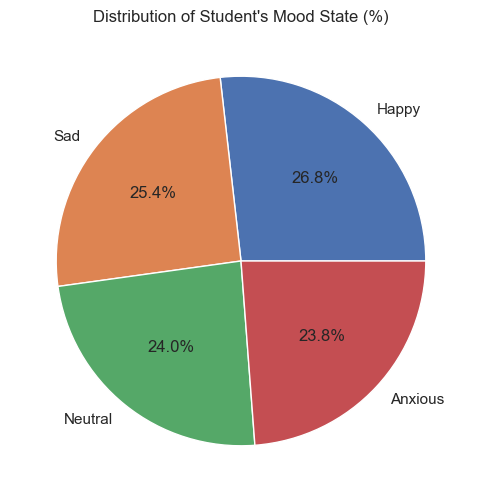

In [103]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Mood State'].value_counts(),labels = data['Mood State'].value_counts().index,autopct='%1.1f%%')
#plt.legend(['0 - Anxious','1 - Sad','2 - Neutral','3 - Happy'])
plt.title("Distribution of Student's Mood State (%)")
plt.show()

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to sil

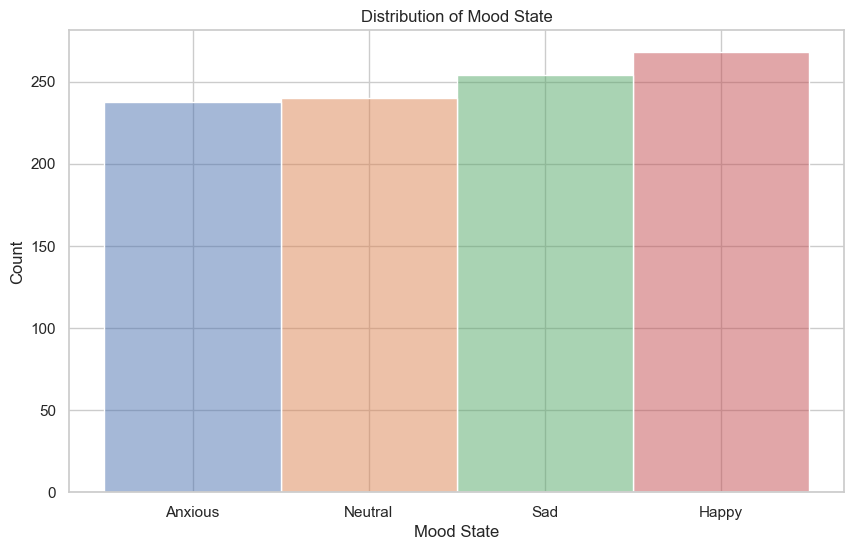

In [104]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.histplot(data, x="Mood State", hue ='Mood State', legend=False)
plt.title('Distribution of Mood State')
plt.xlabel('Mood State')
plt.ylabel('Count')
plt.show()

In [170]:
data.groupby("Mood State").count().reset_index()

,Mood State,Time,HRV,GSR,Oxygen Saturation,Heart Rate,Ambient Noise,Cognitive Load,Psychological State,Respiration Rate,...,Task Type,Age,Gender,Educational Level,Study Major,EEG Power Bands D,EEG Power Bands A,EEG Power Bands B,Blood Pressure Systolic,Blood Pressure Diastolic
0,Anxious,238,238,238,238,238,238,238,238,238,...,238,238,238,238,238,238,238,238,238,238
1,Happy,268,268,268,268,268,268,268,268,268,...,268,268,268,268,268,268,268,268,268,268
2,Neutral,240,240,240,240,240,240,240,240,240,...,240,240,240,240,240,240,240,240,240,240
3,Sad,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254


In [177]:
import plotly.express as px
fig = px.bar(data.groupby("Mood State").count().reset_index(), x='Mood State', y = 'Time',
             color='Mood State', title='Mood State distribution')
fig.show()

## Time

In [110]:
data['Time'] = pd.to_datetime(data['Time'])

In [115]:
data['Time'].dt.hour

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Time, Length: 1000, dtype: int32

In [116]:
data['Time'].dt.date

0      2024-01-01
1      2024-01-01
2      2024-01-01
3      2024-01-01
4      2024-01-01
          ...    
995    2024-01-01
996    2024-01-01
997    2024-01-01
998    2024-01-01
999    2024-01-01
Name: Time, Length: 1000, dtype: object

In [117]:
import plotly.express as px

# Konwersja kolumny 'Time' na typ datetime
# data['Time'] = pd.to_datetime(data['Time'])

# Wykres liniowy dla zmiennej 'Time'
fig_time = px.line(data['Time'].dt.date)
fig_time.show()

In [122]:
fig_time = px.line(data['Time'].dt.time)
fig_time.show()

## HRV

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



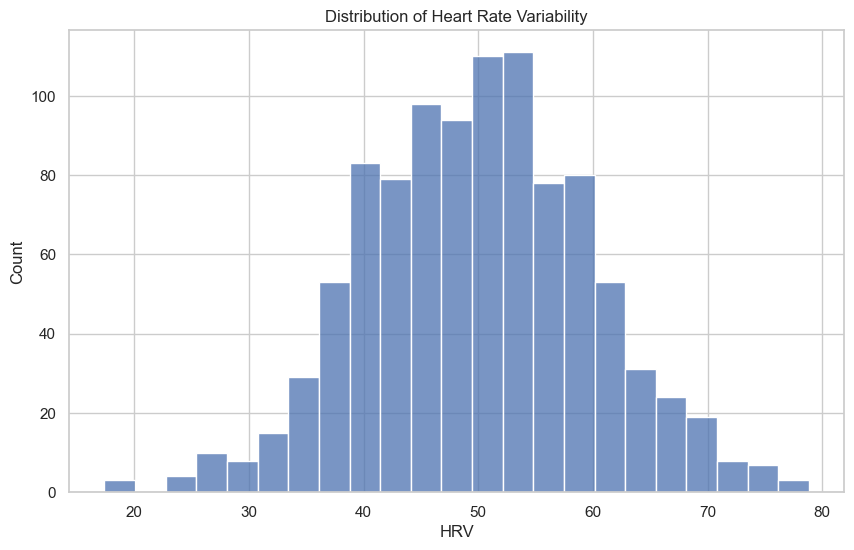

In [128]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.histplot(data['HRV'])
plt.title('Distribution of Heart Rate Variability')
plt.xlabel('HRV')
plt.ylabel('Count')
plt.show()

## GSR

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



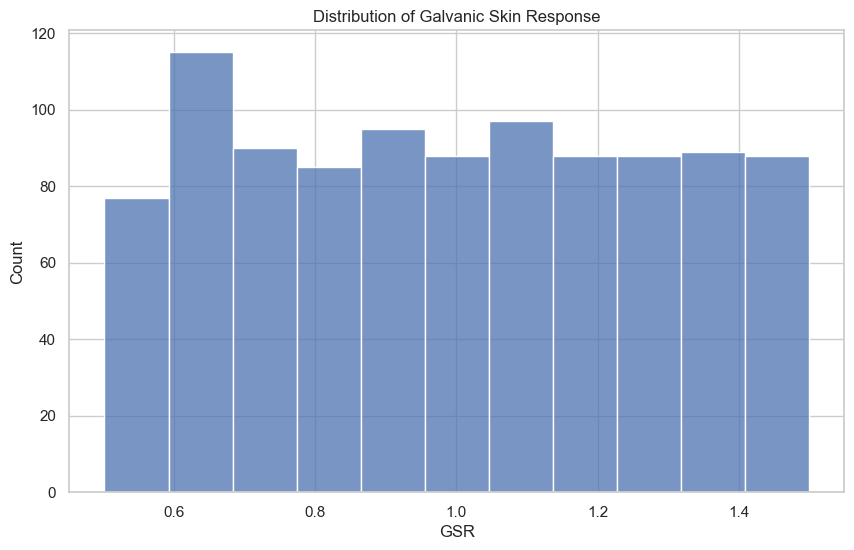

In [132]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.histplot(data['GSR'])
plt.title('Distribution of Galvanic Skin Response')
plt.xlabel('GSR')
plt.ylabel('Count')
plt.show()

## Oxygen Saturation

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



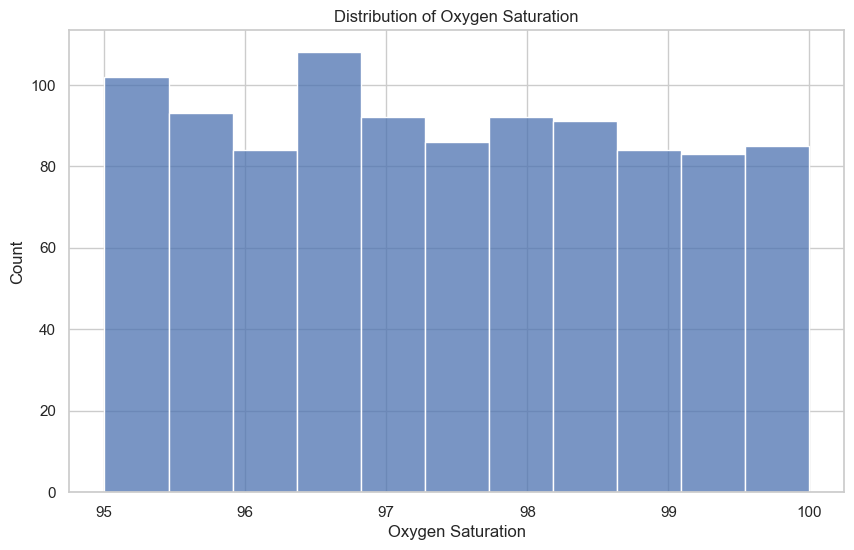

In [133]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.histplot(data['Oxygen Saturation'])
plt.title('Distribution of Oxygen Saturation')
plt.xlabel('Oxygen Saturation')
plt.ylabel('Count')
plt.show()

## Ambient Noise

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



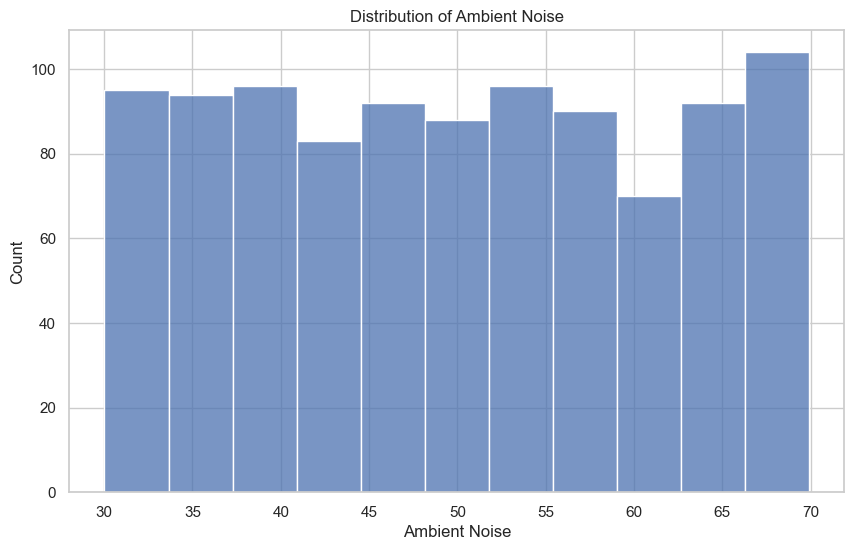

In [134]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.histplot(data['Ambient Noise'])
plt.title('Distribution of Ambient Noise')
plt.xlabel('Ambient Noise')
plt.ylabel('Count')
plt.show()

## Cognitive Load

c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



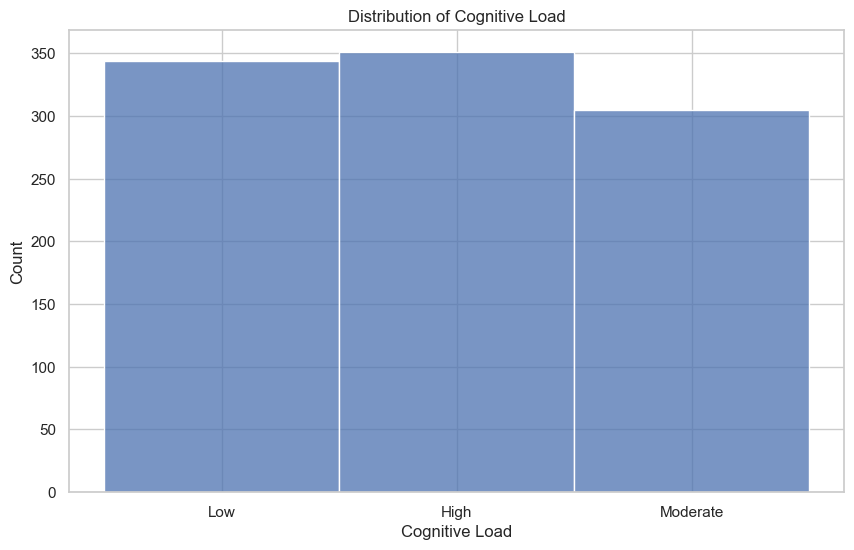

In [135]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.histplot(data['Cognitive Load'])
plt.title('Distribution of Cognitive Load')
plt.xlabel('Cognitive Load')
plt.ylabel('Count')
plt.show()

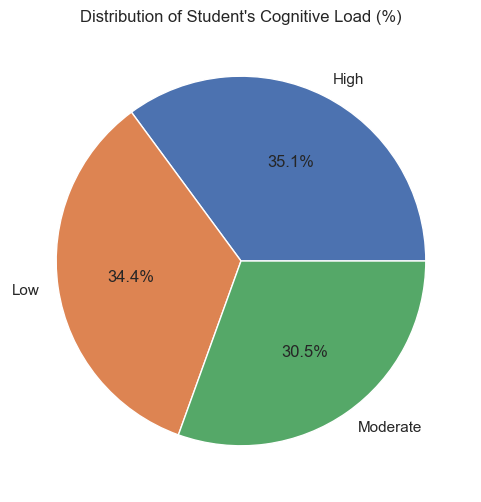

In [136]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Cognitive Load'].value_counts(),labels = data['Cognitive Load'].value_counts().index,autopct='%1.1f%%')
plt.title("Distribution of Student's Cognitive Load (%)")
plt.show()

## Mood State

## Psychological State

## Respiration Rate

## Skin Temp

## Focus Duration

## Task Type

## Age

## Gender

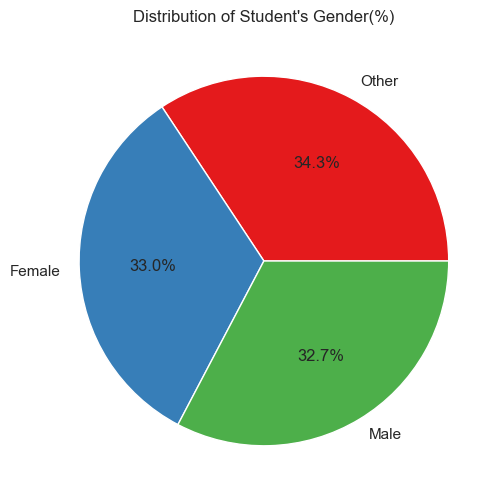

In [142]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Gender'].value_counts(),labels = data['Gender'].value_counts().index,autopct='%1.1f%%',  colors=sns.color_palette("Set1"))
plt.title("Distribution of Student's Gender(%)")
plt.show()

## Educational Level

## Study Major

## EEG Power Bands D

## EEG Power Bands A

## EEG Power Bands B

## Blood Pressure Systolic

## Blood Pressure Diastolic

## INNE WYKRESY

In [79]:
import plotly.express as px

In [80]:

fig_bar = px.bar(data, x='Mood State', color='Gender', title='Mood State by Gender')
fig_bar.show()

In [81]:
import plotly.express as px

# Wykres słupkowy dla Mood State
fig = px.bar(data, x='Mood State', color='Gender', title='Mood State by Gender')
fig.show()

# Histogram wieku uczestników
fig = px.histogram(data, x='Age', nbins=20, title='Histogram wieku uczestników')
fig.show()

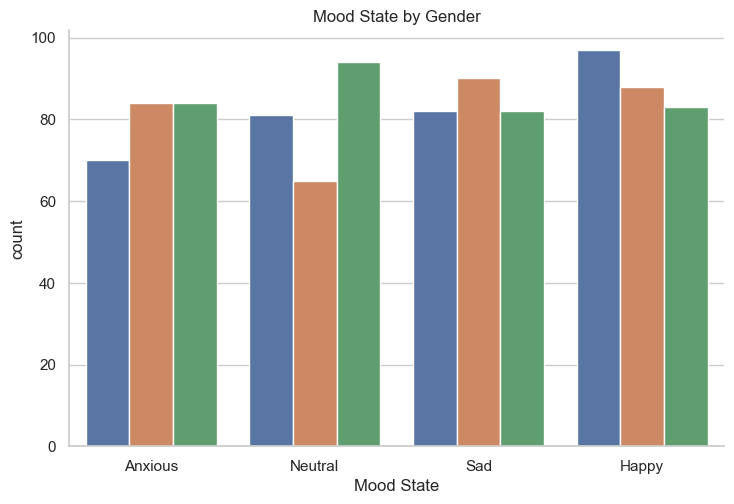

In [82]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Mood State"].notna()], x = "Mood State", kind = 'count', hue = "Gender", legend = False, height = 5, aspect = 3/2)
plt.title("Mood State by Gender")
plt.show()

In [83]:
data["Psychological State"] = data["Psychological State"].map({'Anxious':0,"Stressed":1,"Relaxed":2,"Focused":3}).astype("int64", errors="ignore")

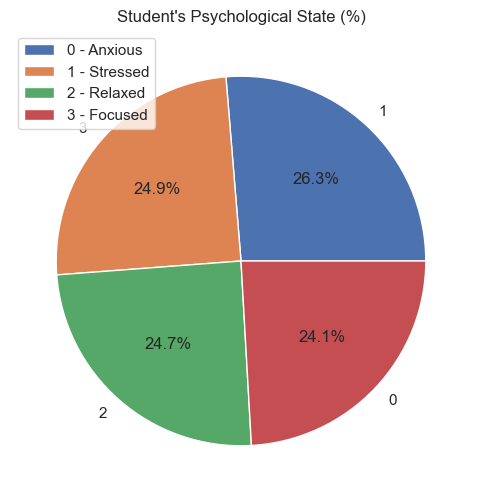

In [84]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Psychological State'].value_counts(),labels = data['Psychological State'].value_counts().index,autopct='%1.1f%%')
plt.legend(['0 - Anxious','1 - Stressed','2 - Relaxed','3 - Focused'])
plt.title("Student's Psychological State (%)")
plt.show()

In [85]:
data["Cognitive Load"] = data["Cognitive Load"].map({'Low':0,"Moderate":1,"High":2}).astype("int64", errors="ignore")

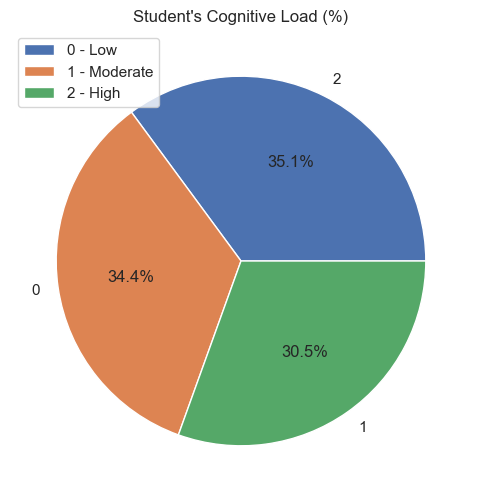

In [86]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Cognitive Load'].value_counts(),labels = data['Cognitive Load'].value_counts().index,autopct='%1.1f%%')
plt.legend(['0 - Low','1 - Moderate','2 - High'])
plt.title("Student's Cognitive Load (%)")
plt.show()

## Feature description

### Categorical

In [87]:
data.dtypes[data.dtypes == 'object']

Mood State           object
Task Type            object
Gender               object
Educational Level    object
Study Major          object
dtype: object

In [88]:
data.describe(include=['O'])

,Mood State,Task Type,Gender,Educational Level,Study Major
count,1000,1000,1000,1000,1000
unique,4,4,3,3,3
top,Happy,Group Discussion,Other,Undergraduate,Arts
freq,268,259,343,338,337


c:\Users\kasia\OneDrive - student.uw.edu.pl\2nd year QF\ML II\ML_projects\psychological-state-classification\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



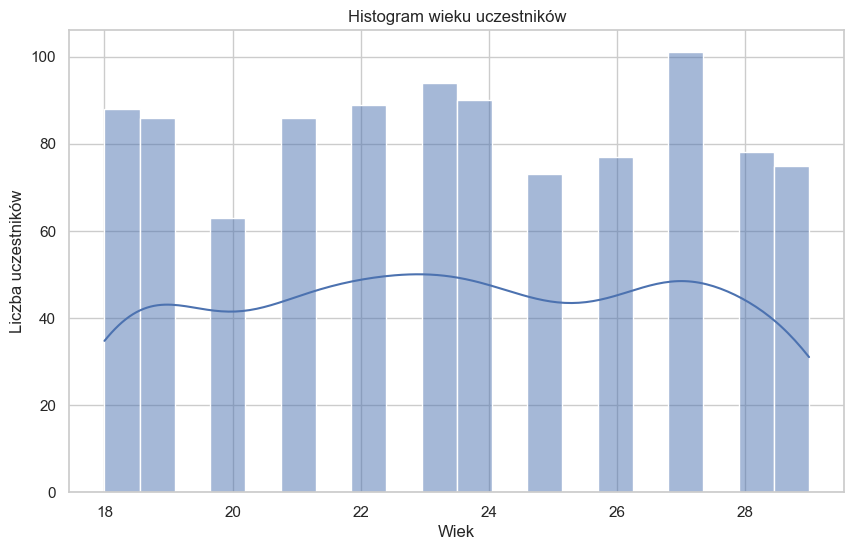

In [89]:
# Histogram wieku uczestników
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Histogram wieku uczestników')
plt.xlabel('Wiek')
plt.ylabel('Liczba uczestników')
plt.show()

In [90]:
# Wykres pudełkowy dla HRV (ms) w zależności od Mood State
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mood State', y='HRV (ms)', data=data)
plt.title('HRV (ms) w zależności od Mood State')
plt.xlabel('Mood State')
plt.ylabel('HRV (ms)')
plt.show()

ValueError: Could not interpret input 'HRV (ms)'

<Figure size 1200x600 with 0 Axes>

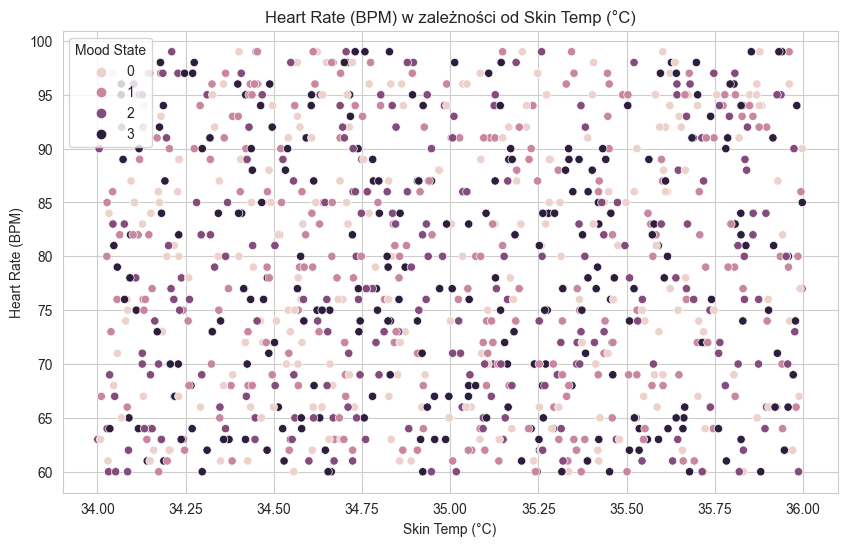

In [21]:
# Wykres rozrzutu dla Heart Rate (BPM) w zależności od Skin Temp (°C)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Skin Temp (°C)', y='Heart Rate (BPM)', hue='Mood State', data=data)
plt.title('Heart Rate (BPM) w zależności od Skin Temp (°C)')
plt.xlabel('Skin Temp (°C)')
plt.ylabel('Heart Rate (BPM)')
plt.legend(title='Mood State')
plt.show()